# Comparison of different clustering algorithms

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from clustertools.load_data import load_spiral_data, load_aggregation_data, load_birch1_data, load_birch3_data, load_compound_data, load_flame_data, load_pathbased_data, load_sets_data, scale_data, load_fuzzy_data
from timeit import default_timer as timer 
from clustertools.models.distance import KMeans, Regspace
from clustertools.models.graph import SpectralClustering
from clustertools.models.density import MeanShift, plot_kde
from clustertools.models.fuzzy import FuzzyCMeans
import pandas as pd
import seaborn as sns
%matplotlib inline

In [24]:
#load fuzzy dataset and pre-process
fuzzy = load_fuzzy_data(scale = 'True')
fuzzy = fuzzy[np.arange(0,2309,2),:]

### Mean Shift Algorithm

In [25]:
def plot_mean_shift(data, labels, bandwidth, outliers): 
 
    f, axarr = plt.subplots(1,3, figsize=(30,10))

    axarr[0].scatter(data[:,0],data[:,1],alpha=.6)
    axarr[0].axis('off')

    axarr[1].scatter(data[:,0],data[:,1],alpha=.6, c = labels, cmap='Set2')
    if outliers >0:
        axarr[1].axis('off')
    else:
        axarr[1].scatter(data[labels==0][:,0],data[labels==0][:,1],s = 100, alpha=.3, marker='*')    
        axarr[1].axis('off')
    
    
    [X, Y, Z] = plot_kde(data[:,0], data[:,1], bandwidth) 
    ma=np.max(np.max(Z)) #max of density
    mi=np.min(np.min(Z)) #min of density
    levels=np.arange(mi,ma+(ma-mi)*0.099,(ma-mi)*0.1) #specify contour levels
    axarr[2].contour(X,Y,Z, levels)
    axarr[2].plot(data[:,0], data[:,1], 'k.', markersize=2, alpha=1)
    axarr[2].axis('off')
    
    axarr[0].set_title('Data points')
    axarr[1].set_title('Clustering')
    axarr[2].set_title('Kernel density estimation')

    plt.show()

101 iterations until termination.
Used bandwidth: 0.230000
Finished after 5.198192812979869
Number of clusters found: 12.000000
There is/are 2.000000 outliers
Max within cluster distance to center: 1.313384
Mean within cluster distance to center: 0.004175
Sum of within cluster squared errors: 3.457955


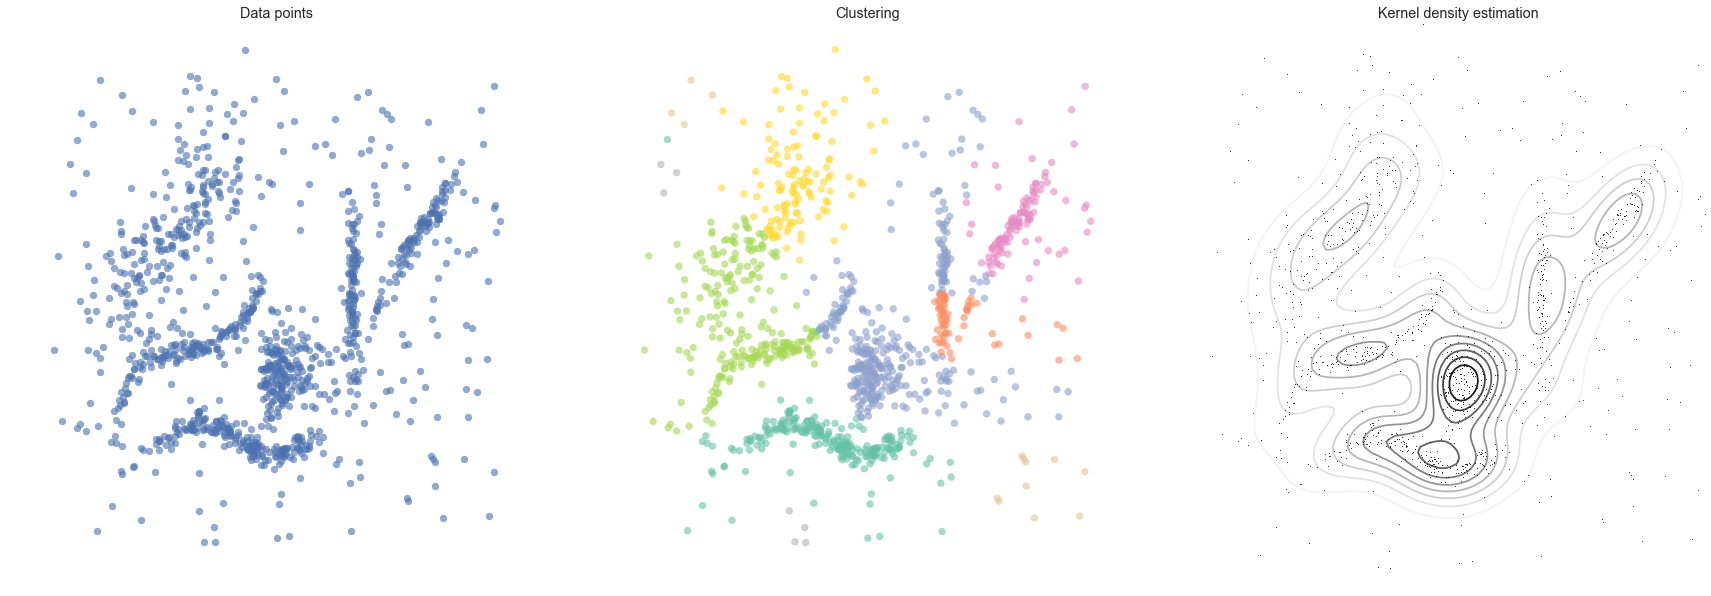

In [26]:
data = fuzzy
bandwidth = 0.23
ms = MeanShift(data, bandwidth)
ms.fit()
labels = ms._cluster_labels
bandwidth = ms._bandwidth   
outliers = ms._outliers 

plot_mean_shift(data, labels, bandwidth, outliers)

## Fuzzy C Means

In [27]:
def plot_fuzzy_cmeans(data, labels, Uk, c):
    f, axarr = plt.subplots(1,3, figsize=(30,10))
    axarr[0].scatter(data[:,0],data[:,1],alpha=.6)
    axarr[1].scatter(data[:,0],data[:,1],alpha=.6, c=labels, cmap='Set2')
    for i in range(c):
        axarr[2].scatter(data[:,0],data[:,1],alpha=.2,s = np.pi * (30 * Uk[i,:])**2)
    axarr[0].axis('off')
    axarr[1].axis('off')
    axarr[2].axis('off')
    axarr[0].set_title('Data points')
    axarr[1].set_title('Hard clustering')
    axarr[2].set_title('Fuzzy clustering')
    plt.show()

Finished after 0.21735481511916532
29 iterations until termination.
Max within cluster distance to center: 2.365042
Mean within cluster distance to center: 0.517759
Sum of within cluster squared errors: 432.889173


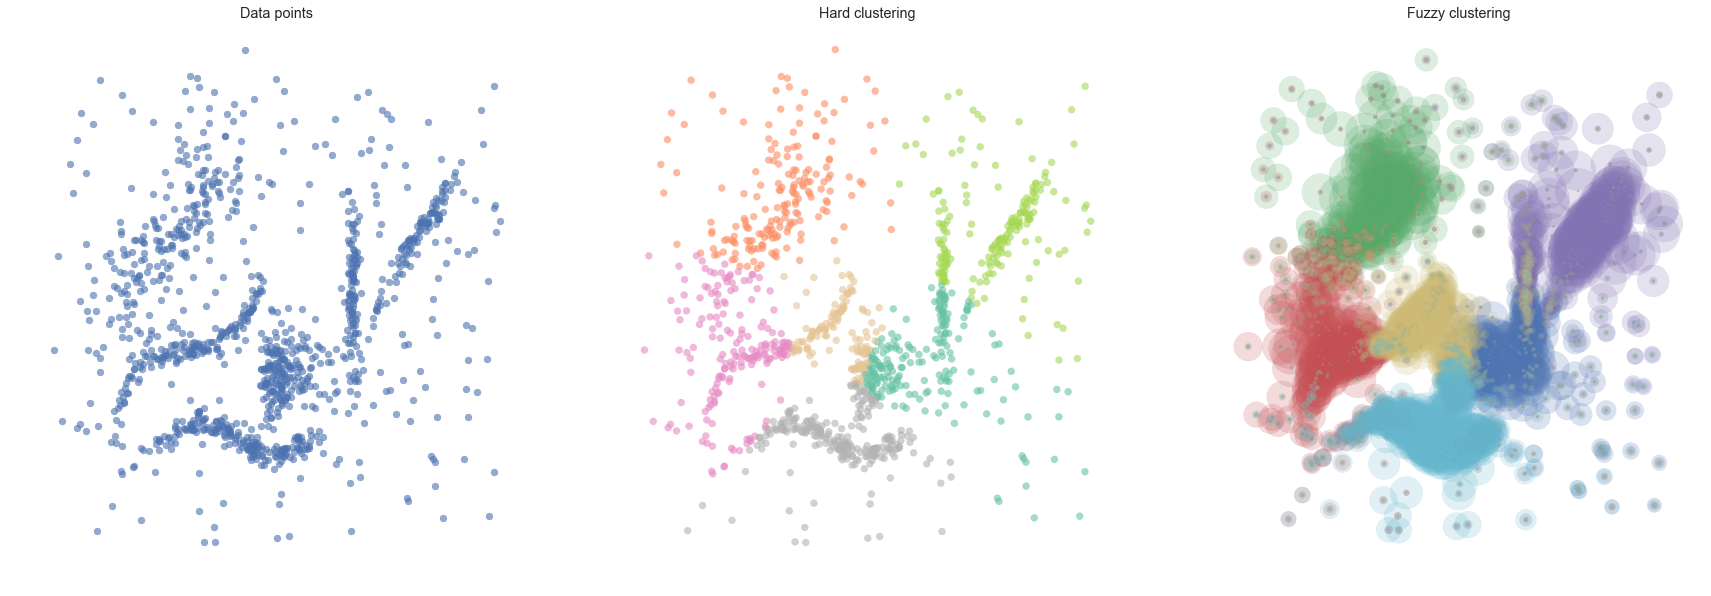

In [28]:
data = fuzzy
c=6
ms = FuzzyCMeans(data,c )
ms.fit()
labels = ms._cluster_labels
Uk = ms._membership 
plot_fuzzy_cmeans(data, labels, Uk, c)

### Clustering on different data sets

In [29]:
def format_subplots(size):
    plt.figure(figsize=size)
    ax1 = plt.subplot2grid((2,5), (0, 0))
    ax2 = plt.subplot2grid((2,5), (0, 1))
    ax3 = plt.subplot2grid((2,5), (0, 2))
    ax4 = plt.subplot2grid((2,5), (0, 3))
    ax5 = plt.subplot2grid((2,5), (0, 4))
    ax6 = plt.subplot2grid((2,6), (1,0), colspan=6)
    ax = [ax1,ax2, ax3, ax4, ax5]
    row_labels=['Data points', 'Dimension', 'Computing time [s]', '# of iterations',  '# of clusters', 'Mean cluster to center']
    column_labels=['Spiral','Aggregation','Compound', 'Fuzzy', 'Pathbased']
    return ax, row_labels, column_labels

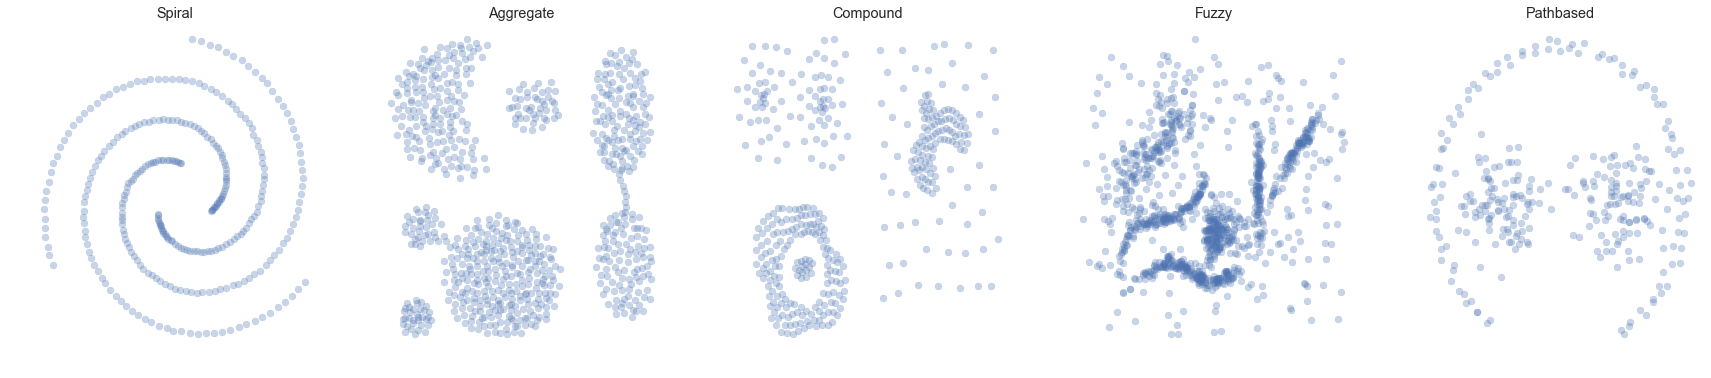

In [19]:
f, axarr = plt.subplots(1,5, figsize=(30,6))

spiral=load_spiral_data(scale = 'True')
aggr=load_aggregation_data(scale = 'True')
compound = load_compound_data(scale = 'True')
fuzzy = load_fuzzy_data(scale = 'True')
fuzzy = fuzzy[np.arange(0,2309,2),:]
pathbased = load_pathbased_data(scale = 'True')
dataset = [spiral, aggr, compound, fuzzy, pathbased]

for i in range(5):
    axarr[i].scatter(dataset[i][:,0],dataset[i][:,1],alpha=.3)
    axarr[i].axis('off')
    
axarr[0].set_title('Spiral')
axarr[1].set_title('Aggregate')
axarr[2].set_title('Compound')
axarr[3].set_title('Fuzzy')
axarr[4].set_title('Pathbased')
plt.show()

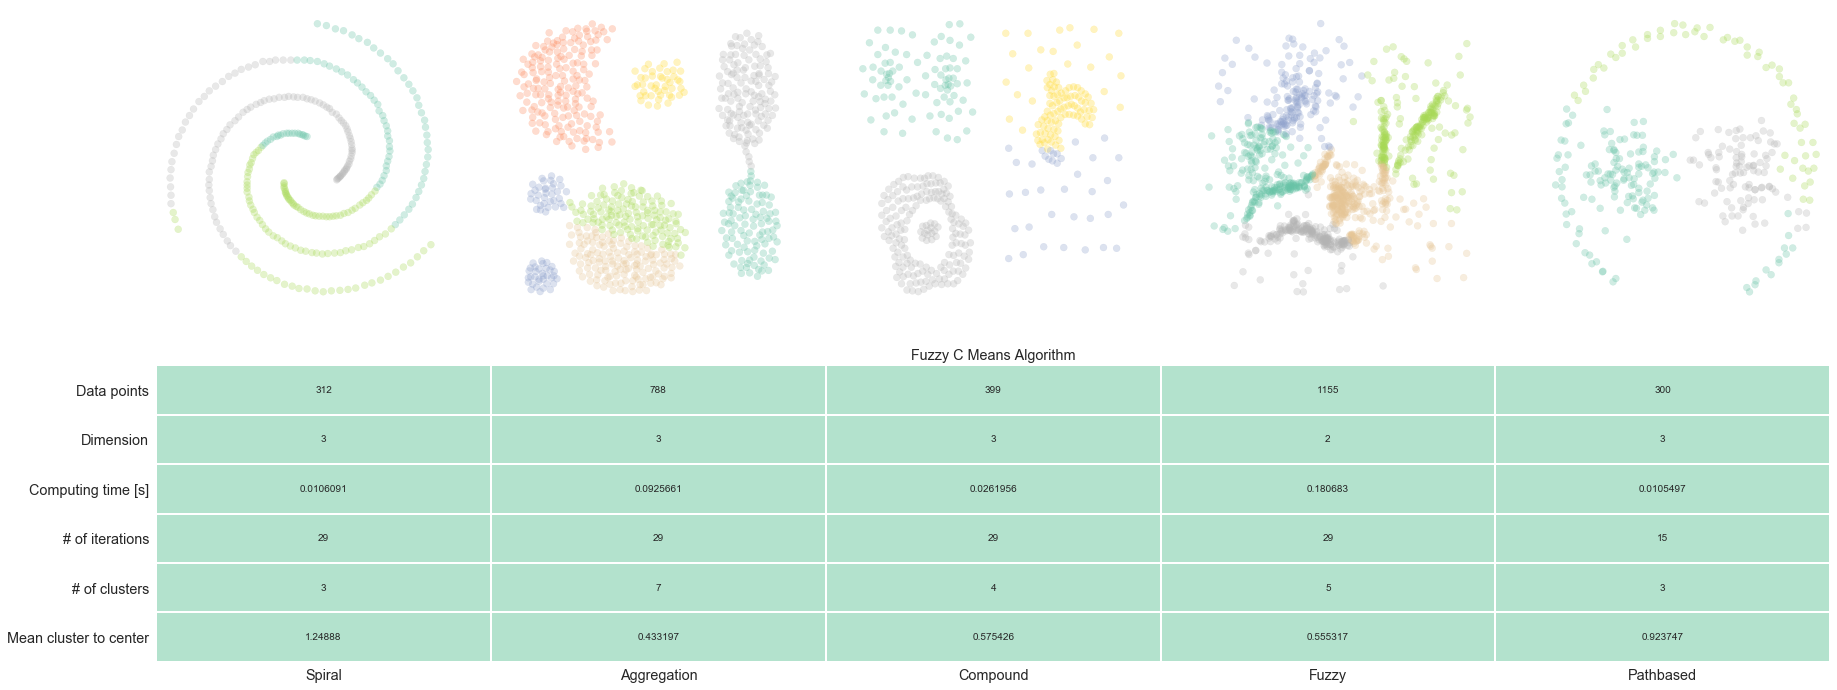

In [30]:
ax, row_labels, column_labels = format_subplots((30,12))

dataset = [spiral, aggr, compound, fuzzy, pathbased]
clusternumber= [3,7,4,5,3]
results = np.zeros((2,6,5))
ax[0].axis('off')
for i in range(5):
    results[0, 0,i] = int(np.size(dataset[i],0))
    results[0, 1,i] = int(np.size(dataset[i],1))
    data = dataset[i]
    c=clusternumber[i]
    results[0, 4,i] = c
    f = FuzzyCMeans(data,c, verbose = False )
    f.fit()
    labels = f._cluster_labels
    results[0, 5,i] = np.mean(f._cluster_dist)
    results[0, 2,i] = f._time
    results[0, 3,i] = f._iter 
    ax[i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[i].axis('off')


df = pd.DataFrame(results[0,:,:], row_labels, column_labels)
ax6 = sns.heatmap(df,vmin=0, vmax=10000, annot=True,cbar = False, fmt="g", linewidths=1, cmap="Pastel2")

plt.title('Fuzzy C Means Algorithm')
plt.show()

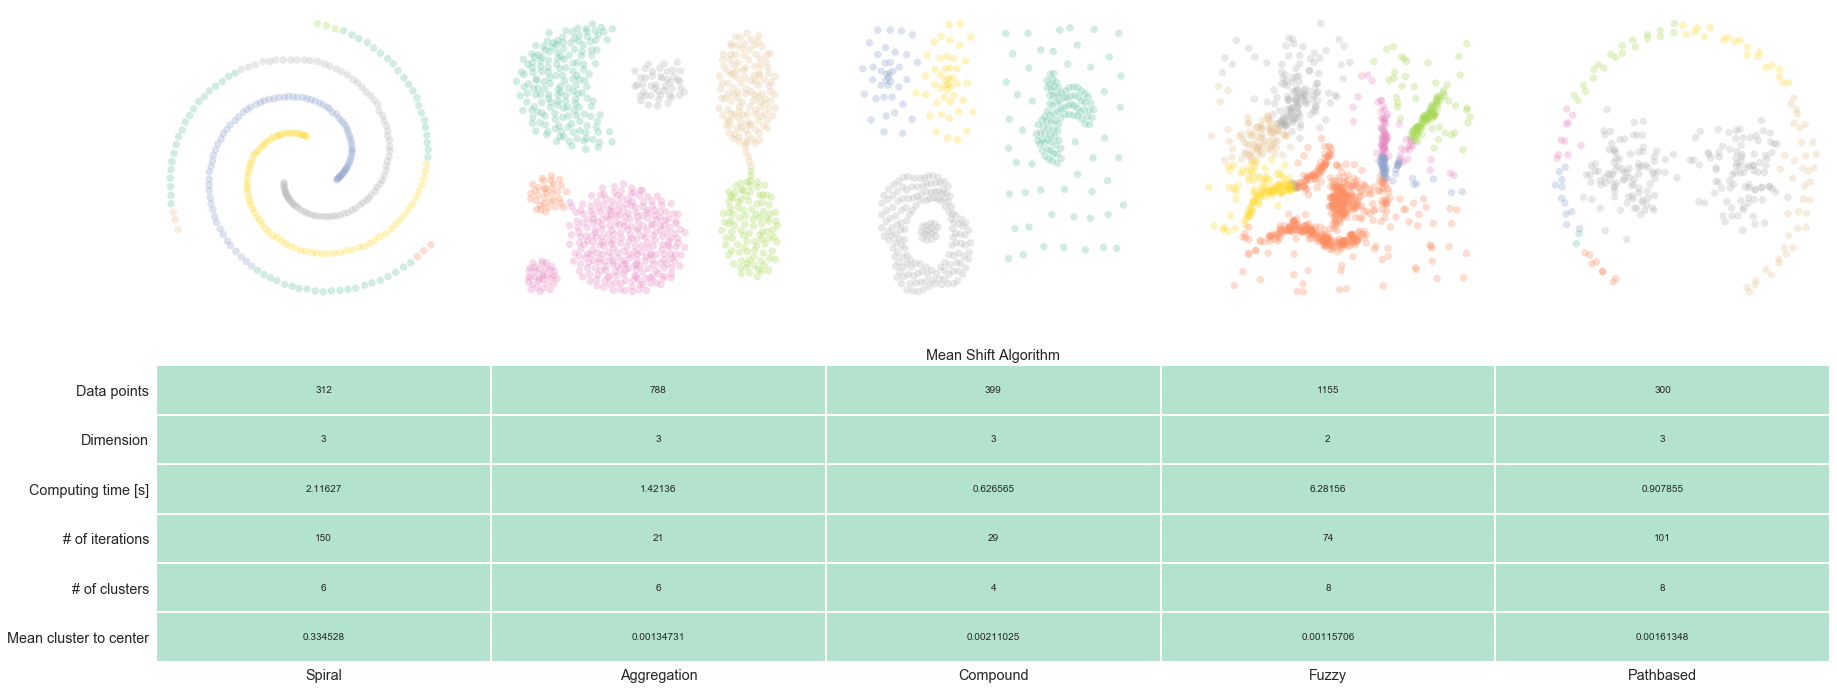

In [31]:
ax, row_labels, column_labels = format_subplots((30,12))

dataset = [spiral, aggr, compound, fuzzy, pathbased]

for i in range(5):
    results[1,0,i] = int(np.size(dataset[i],0))
    results[1,1,i] = int(np.size(dataset[i],1))
    data = dataset[i]
    ms = MeanShift(data, verbose = False)
    ms.fit()
    labels = ms._cluster_labels
    results[1,5,i] = np.mean(ms._cluster_dist)
    results[1,2,i] = ms._time
    results[1,3,i] = ms._iter 
    results[1,4,i] = max(labels)
    ax[i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[i].axis('off')

df = pd.DataFrame(results[1,:,:], row_labels, column_labels)

ax6 = sns.heatmap(df,vmin=0, vmax=10000, annot=True,cbar = False, fmt="g", linewidths=1, cmap="Pastel2")

plt.title('Mean Shift Algorithm')
plt.show()

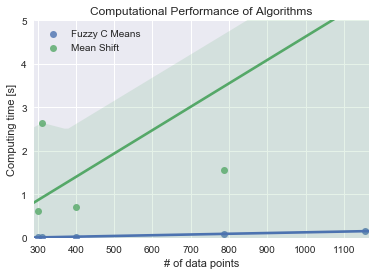

In [83]:
#not good because data has different dimensions, d=2 and 3
ax = sns.regplot(x=results[0,0,:], y=results[0,2,:],  label='Fuzzy C Means')
ax = sns.regplot(x=results[1,0,:], y=results[1,2,:],  label='Mean Shift')
plt.gca().axis([min(results[0,0,:])-10, max(results[0,0,:])+10, 0, 5])
plt.gca().set_xlabel('# of data points')
plt.gca().set_ylabel('Computing time [s]')
plt.title('Computational Performance of Algorithms')
plt.legend()
plt.show()

In [108]:
def computational_complexity(datapoints, data):
    time = np.zeros((5, np.shape(datapoints)[0]))
    #2 dimensions only for now
    #2 methods only
    for i,nbr in enumerate(datapoints):
        #fuzzy c means
        start_time = timer()
        alg = FuzzyCMeans(data[np.random.randint(1,  np.shape(data)[0], nbr),:], c=4, verbose=False)
        alg.fit()
        time_taken = timer() - start_time
        time[0,i]=time_taken 
        #mean shift
        start_time = timer()
        alg = MeanShift(data[np.random.randint(1,  np.shape(data)[0], nbr),:], verbose=False)
        alg.fit()
        time_taken = timer() - start_time
        time[1,i]=time_taken 
        #k means
        start_time = timer()
        alg = KMeans(data[np.random.randint(1,  np.shape(data)[0], nbr),:],4, verbose=False)
        alg.fit()
        time_taken = timer() - start_time
        time[2,i]=time_taken 
        #RegSpace
        start_time = timer()
        alg = Regspace(data[np.random.randint(1,  np.shape(data)[0], nbr),:],10,.3, verbose=False)
        alg.fit()
        time_taken = timer() - start_time
        time[3,i]=time_taken 
        #Spectral Clustering
        start_time = timer()
        alg = SpectralClustering(data[np.random.randint(1,  np.shape(data)[0], nbr),:],5,similarity_measure='gaussian',bandwidth=.3,laplacian='normalized', verbose=False)
        alg.fit()
        time_taken = timer() - start_time
        time[4,i]=time_taken
        
        
    method_label = ['Fuzzy C-Means', 'Mean Shift', 'K-Means','RegSpace','Spectral Clustering']                          
    return time,  method_label       

In [111]:
birch3=load_birch3_data(scale = 'True')
data= birch3[:6000,:2]
datapoints = np.arange(0, np.shape(data)[0], 2500)[1:]

time, method_label = computational_complexity(datapoints, data)

Constructing gaussian similarity matrix
Computing generalized Laplacian eigenproblem
Constructing gaussian similarity matrix
Computing generalized Laplacian eigenproblem


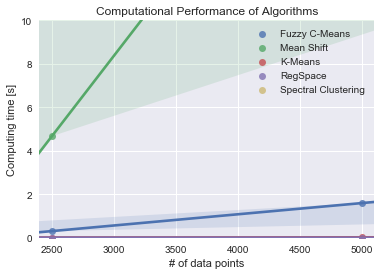

In [164]:
#f, axarr = plt.subplots( 1,2, figsize=(17,6))
for i in range(len(method_label)):
    sns.regplot(x=datapoints, y=time[i,:],  label=method_label[i])
    #sns.regplot(x=datapoints, y=time[i,:], ax = axarr[1],  label=method_label[i])

plt.gca().axis([min(datapoints)-100, max(datapoints)+100, 0, 10])#,ax = axarr[0])
#plt.gca().axis([min(datapoints)-100, max(datapoints)+100, 0, 1000])#,ax = axarr[1])
plt.gca().set_xlabel('# of data points')
plt.gca().set_ylabel('Computing time [s]')
plt.title('Computational Performance of Algorithms')
plt.legend()

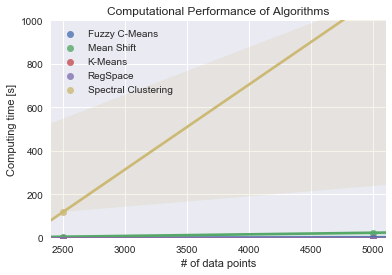

In [129]:
for i in range(len(method_label)):
    ax = sns.regplot(x=datapoints, y=time[i,:],  label=method_label[i])
plt.gca().axis([min(datapoints)-100, max(datapoints)+100, 0, 1000])
plt.gca().set_xlabel('# of data points')
plt.gca().set_ylabel('Computing time [s]')
plt.title('Computational Performance of Algorithms')
plt.legend()

### Comparison of clustering algorithms